### illustrates how to process the post 2017 'forecasts' from the CDS with the weird bug affecting the 'step' dimension 

In [31]:
%matplotlib inline

In [32]:
from matplotlib import pyplot as plt

In [33]:
import pathlib

In [34]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [35]:
import pandas as pd 

In [36]:
import xarray as xr

In [37]:
HOME = pathlib.Path.home()

In [38]:
dpath = HOME / 'research' / 'Smart_Ideas' / 'data' / 'GCMs' / 'GRIB'

In [39]:
dpath

PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/GRIB')

In [40]:
year = 2018

In [41]:
lfiles = list(dpath.rglob(f"*{year}.grib"))

In [42]:
lfiles

[PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/GRIB/UKMO/PRECIP/UKMO_system_12_13_14_PRECIP_2018.grib'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/GRIB/UKMO/T2M/UKMO_system_12_13_14_T2M_2018.grib'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/GRIB/UKMO/SST/UKMO_system_12_13_14_SST_2018.grib'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/GRIB/DWD/PRECIP/DWD_system_2_PRECIP_2018.grib'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/GRIB/DWD/Z500/DWD_system_2_Z500_2018.grib'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/GRIB/DWD/T2M/DWD_system_2_T2M_2018.grib'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/GRIB/DWD/Z850/DWD_system_2_Z850_2018.grib'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/GRIB/DWD/SST/DWD_system_2_SST_2018.grib'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/GRIB/ECMWF/PRECIP/ECMWF_system_5_PRECIP_2018.grib'),
 PosixPath('/home/nicolasf/research/Sm

In [ ]:
for fname in lfiles: 
    try:
        dset = xr.open_dataset(fname, engine='cfgrib', backend_kwargs={'indexpath':''})
        print(dset.info)
        dset.close()
    except: 
        print(f"unable to open {str(fname)}\n\n\n")
        pass

### Solution for opening the 2018 grib file with xarray

In [192]:
dset_0 = xr.open_dataset(lfiles[0], engine='cfgrib', backend_kwargs={"indexpath":"", 'filter_by_keys':{'longitudeOfFirstGridPointInDegrees': 0.0}})

### only one time here 

In [193]:
dset_0 = dset_0 * 1e7

In [194]:
dset_0_m = dset_0.mean('number')

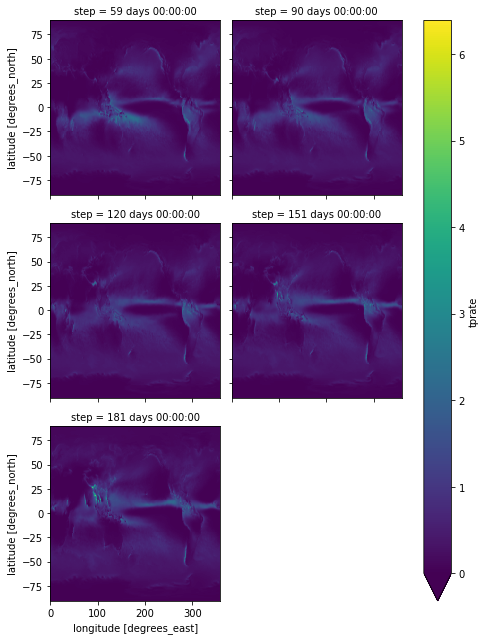

In [195]:
dset_0_m['tprate'].plot(x='longitude',y='latitude', col='step', col_wrap=2, vmin=0)

### and here 11 

In [178]:
dset_05 = xr.open_dataset(lfiles[0], engine='cfgrib', backend_kwargs={"indexpath":"", 'filter_by_keys':{'longitudeOfFirstGridPointInDegrees': 0.5}})

In [179]:
dset_05

<xarray.Dataset>
Dimensions:     (latitude: 180, longitude: 360, number: 62, step: 18, time: 11)
Coordinates:
  * number      (number) int64 0 1 2 3 4 5 6 7 8 ... 53 54 55 56 57 58 59 60 61
  * time        (time) datetime64[ns] 2018-02-01 2018-03-01 ... 2018-12-01
  * step        (step) timedelta64[ns] 59 days 61 days ... 183 days 184 days
    surface     int64 ...
  * latitude    (latitude) float64 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude   (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    tprate      (number, time, step, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             egrr
    GRIB_centreDescription:  U.K. Met Office - Exeter
    GRIB_subCentre:          98
    Conventions:             CF-1.7
    institution:             U.K. Met Office - Exeter
    history:                 2019-12-12T21:23:01 GRIB to CDM+CF via cfgrib-0....

In [183]:
dset_05 = dset_05 * 1e7

In [184]:
dset_05_m = dset_05.mean('number')

/home/nicolasf/anaconda3/envs/pangeo/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


with values, index along the `step` dimension: 

+ 0
+ 3
+ 7 
+ 11 = anomalies 
+ 14 = anomalies

In [189]:
dset_05_m = dset_05_m.isel(step=[0,3,7,11,14])

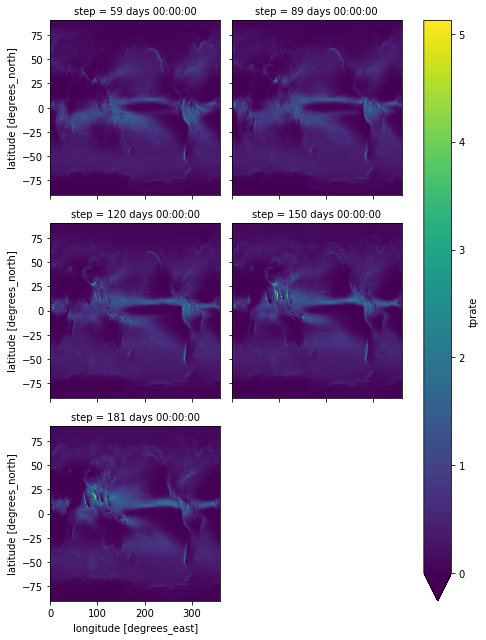

In [191]:
dset_05_m.isel(time=0)['tprate'].plot(x='longitude',y='latitude', col='step', col_wrap=2, vmin=0)

In [205]:
dset_0_m['step'] = (('step'), list(range(1, 6)))

In [206]:
dset_05_m['step'] = (('step'), list(range(1, 6)))

In [207]:
dset_0_m

<xarray.Dataset>
Dimensions:     (latitude: 180, longitude: 360, step: 5)
Coordinates:
    time        datetime64[ns] ...
    valid_time  (step) datetime64[ns] ...
  * latitude    (latitude) float64 89.0 88.0 87.0 86.0 ... -88.0 -89.0 -90.0
    surface     int64 ...
  * longitude   (longitude) float64 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * step        (step) int64 1 2 3 4 5
Data variables:
    tprate      (step, latitude, longitude) float32 0.06236374 ... 7.872342e-06

In [208]:
dset_05_m

<xarray.Dataset>
Dimensions:     (latitude: 180, longitude: 360, step: 5, time: 11)
Coordinates:
  * latitude    (latitude) float64 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * step        (step) int64 1 2 3 4 5
    surface     int64 ...
  * time        (time) datetime64[ns] 2018-02-01 2018-03-01 ... 2018-12-01
  * longitude   (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    tprate      (time, step, latitude, longitude) float32 0.053829595 ... nan

In [209]:
dset_m = xr.concat([dset_0_m, dset_05_m], dim='time')

In [210]:
dset_m

<xarray.Dataset>
Dimensions:     (latitude: 360, longitude: 720, step: 5, time: 12)
Coordinates:
    surface     int64 0
  * latitude    (latitude) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5
  * longitude   (longitude) float64 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * step        (step) int64 1 2 3 4 5
  * time        (time) datetime64[ns] 2018-01-01 2018-02-01 ... 2018-12-01
    valid_time  (step, time) datetime64[ns] 2018-03-01 2018-04-01 ... 2019-05-31
Data variables:
    tprate      (step, latitude, longitude, time) float32 -8.673268e-06 ... nan

In [126]:
dset_05.time

<xarray.DataArray 'time' (time: 11)>
array(['2018-02-01T00:00:00.000000000', '2018-03-01T00:00:00.000000000',
       '2018-04-01T00:00:00.000000000', '2018-05-01T00:00:00.000000000',
       '2018-06-01T00:00:00.000000000', '2018-07-01T00:00:00.000000000',
       '2018-08-01T00:00:00.000000000', '2018-09-01T00:00:00.000000000',
       '2018-10-01T00:00:00.000000000', '2018-11-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-02-01 2018-03-01 ... 2018-12-01
    surface  int64 ...
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time

In [136]:
dset_05_na = dset_05_m.dropna(dim='step')

In [137]:
dset_05_na

<xarray.Dataset>
Dimensions:     (latitude: 180, longitude: 360, step: 0, time: 11)
Coordinates:
  * time        (time) datetime64[ns] 2018-02-01 2018-03-01 ... 2018-12-01
  * step        (step) timedelta64[ns] 
    surface     int64 ...
  * latitude    (latitude) float64 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude   (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    tprate      (time, step, latitude, longitude) float32 

### problem with UKMO 2018

In [87]:
import pygrib
import numpy as np

In [45]:
lfiles[0]

PosixPath('/home/nicolasf/research/Smart_Ideas/data/GCMs/GRIB/UKMO/PRECIP/UKMO_system_12_13_14_PRECIP_2018.grib')

In [66]:
grb = pygrib.open(str(lfiles[0]))

In [67]:
arr = []
messages = []

In [68]:
for g in grb: 
    arr.append(g.values)
    messages.append(str(g))

In [91]:
arr = np.array(arr)

In [97]:
arr.shape

(3110, 180, 360)

In [98]:
d = {}
d['t'] = (('t'), list(range(arr.shape[0])))
d['y'] = (('y'), list(range(arr.shape[1])))
d['x'] = (('x'), list(range(arr.shape[2])))
d['sst'] = (('t','y','x'), arr)


In [99]:
dset = xr.Dataset(d)

In [104]:
dsetna = dset.dropna('t')

In [105]:
dsetna

<xarray.Dataset>
Dimensions:  (t: 3110, x: 360, y: 180)
Coordinates:
  * t        (t) int64 0 1 2 3 4 5 6 7 ... 3103 3104 3105 3106 3107 3108 3109
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 171 172 173 174 175 176 177 178 179
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 351 352 353 354 355 356 357 358 359
Data variables:
    sst      (t, y, x) float64 2.685e-09 2.685e-09 ... 3.08e-09 3.08e-09

In [94]:
3110/4

777.5

In [85]:
valid_times = [x[-26:] for x in messages]

In [88]:
valid_times = np.array(valid_times)

In [90]:
np.unique(valid_times).shape

(60,)

In [84]:
messages[0][-26:]

'1416 hrs:from 201801010000'

In [ ]:
messages 

In [57]:
str(g)

'3110:Total precipitation:m s**-1 (instant):regular_ll:surface:level 0:fcst time 4368 hrs:from 201812010000'

In [ ]:
for a in arr: 
    print(a.shape)

In [52]:
a

array([[4.57893687e-09, 4.57893687e-09, 4.57893687e-09, ...,
        4.57893687e-09, 4.53528112e-09, 4.57893687e-09],
       [4.57893687e-09, 4.60804070e-09, 4.57893687e-09, ...,
        4.40431389e-09, 4.46252155e-09, 4.53528112e-09],
       [3.32747216e-09, 3.32747216e-09, 3.32747216e-09, ...,
        3.24016067e-09, 3.24016067e-09, 3.32747216e-09],
       ...,
       [4.69535219e-09, 4.65169644e-09, 4.62259261e-09, ...,
        4.81176751e-09, 4.76811177e-09, 4.73900794e-09],
       [4.57893687e-09, 4.53528112e-09, 4.49162538e-09, ...,
        4.65169644e-09, 4.65169644e-09, 4.60804070e-09],
       [3.08008960e-09, 3.05098577e-09, 3.05098577e-09, ...,
        3.08008960e-09, 3.08008960e-09, 3.08008960e-09]])

In [ ]:
dset = xr.open_dataset('../../data/GCMs/GRIB/METEO_FRANCE/T2M/METEO_FRANCE_system_6_T2M_2019.grib', engine='cfgrib', backend_kwargs={'indexpath':''})

In [ ]:
dset

In [ ]:
dset_corrected = []

In [ ]:
for t in range(len(dset.time)): 
    sub = dset.isel(time=t)
    sub = sub.dropna(dim='step')
    print(len(sub.step))
    sub['step'] = (('step'), list(range(1, len(sub.step) + 1)))
    dset_corrected.append(sub)

In [ ]:
dset = xr.concat(dset_corrected, dim='time')